In [ ]:
%run common.ipynb

['LC_Type1', 'LST_Day_1km', 'pr', 'aet', 'NDVI', 'EVI']
['LST_Day_1km', 'pr', 'aet', 'NDVI', 'EVI']
['LC_Type1']


In [ ]:
%run tuning_common.ipynb

In [ ]:
landcover_names={
    "1.0":"Evergreen Needleleaf Forests",
    "2.0":"Evergreen Broadleaf Forests",
    "3.0":"Deciduous Needleleaf Forests",
    "4.0":"Deciduous Broadleaf Forests",
    "5.0":"Mixed Forests",
    "6.0":"Closed Shrublands",
    "7.0":"Open Shrublands",
    "8.0":"Woody Savannas",
    "9.0":"Savannas",
    "10.0":"Grasslands",
    "11.0":"Permanent Wetlands",
    "12.0":"Croplands",
    "13.0":"Urban and Built-up Lands",
    "14.0":"Cropland/Natural Vegetation Mosaics",
    "15.0":"Permanent Snow and Ice",
    "16.0":"Barren",
    "17.0":"Water Bodies",
}

landcover_abbr={
    "1.0":"ENF",
    "2.0":"EBF",
    "3.0":"DNF",
    "4.0":"DBF",
    "5.0":"MF",
    "6.0":"CS",
    "7.0":"OS",
    "8.0":"WS",
    "9.0":"SAV",
    "10.0":"GRA",
    "11.0":"PW",
    "12.0":"CRO",
    "13.0":"UBL",
    "14.0":"CNVM",
    "15.0":"PSI",
    "16.0":"BAR",
    "17.0":"WB",
}

In [ ]:
def concat(df_list):
    return pd.concat(df_list, ignore_index=True)

In [ ]:
downstream_train_df = pd.read_csv(f'{DATA_FOLDER}{DOWNSTREAM_TRAIN_FILENAME}')
downstream_test_df = pd.read_csv(f'{DATA_FOLDER}{DOWNSTREAM_TEST_FILENAME}')

In [ ]:
downstream_train_df = embed_catgorical_features(downstream_train_df, CATEGORICAL_FEATURES)
downstream_test_df = embed_catgorical_features(downstream_test_df, CATEGORICAL_FEATURES)
test_tf = df_to_dataset(downstream_test_df[FEATURES], shuffle=False, batch_size=1)

/content/drive/MyDrive/CO2/fttransformer/utils/preprocessing.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


In [ ]:
def load_ft_transformer(model_path):
    return tf.keras.models.load_model(model_path)

In [ ]:
def get_gpp_for_all_landcovers(target_df, df_list):
    all_landcover_df_list={}
    all_landcovers = target_df[CATEGORICAL_FEATURES[0]].unique()
    for lc in all_landcovers:
        df_actual = target_df[target_df[CATEGORICAL_FEATURES[0]] == lc]
        all_landcover_df_list[lc] = []
        all_landcover_df_list[lc].append(df_actual[TARGET_FEATURE])
        for model_df in df_list:
            model_df = model_df.iloc[df_actual.index]
            all_landcover_df_list[lc].append(model_df[TARGET_FEATURE])

    return all_landcover_df_list

In [ ]:
def compare_with_modis_by_landcover(y_pred):
    all_landcover_df_list = get_gpp_for_all_landcovers(downstream_test_df, [pd.DataFrame({TARGET_FEATURE:y_pred}), modis_result])
    print(f'Total landcover types = {len(all_landcover_df_list)}')
    for lc, df_list in all_landcover_df_list.items():
        print(f'landcover type ({lc}) = {landcover_names[lc]}, samples = {len(df_list[0])}')
        get_rmse_metrics(df_list[1], df_list[2], df_list[0])
        plot_result_distribution(df_list[0], df_list[1], df_list[2], title=f'{landcover_names[lc]}({lc})')

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
import matplotlib.font_manager as fm

fm.get_font_names()

['cmtt10',
 'cmsy10',
 'STIXSizeFourSym',
 'Humor Sans',
 'cmb10',
 'Liberation Mono',
 'Liberation Serif',
 'cmr10',
 'cmex10',
 'STIXNonUnicode',
 'Liberation Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'cmss10',
 'STIXGeneral',
 'cmmi10',
 'DejaVu Sans',
 'Liberation Sans Narrow',
 'DejaVu Sans Display',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym']

In [ ]:
font_files = fm.findSystemFonts('.')
for font_file in font_files:
    # print(font_file)
    fm.fontManager.addfont(font_file)

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"

## Visualize distribution of upstream landcover

In [ ]:
def visualize_feature_distribution(df, feature, save_dir=None):
    tmp_df = pd.DataFrame({feature: df[feature]}).sort_values([feature])
    value_list = tmp_df[feature].tolist()
    bins = np.arange(1, len(landcover_names)+1)-0.5
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['axes.axisbelow'] = True
    plt.grid(alpha=.3, zorder=0)
    plt.tick_params(top=False, bottom=False, left=False, right=False)
    plt.box(False)
    counts, edges, bars = plt.hist(value_list, color='tab:blue', bins=bins, height=0.8, orientation='horizontal')
    plt.bar_label(bars, padding=5.5)
    plt.yticks(np.arange(1, len(landcover_names)+1), landcover_abbr.values())
    locs, labels = plt.xticks()
    plt.xticks(locs, ['0','5K','10K','15K','20K','25K','30K','35K'])
    plt.ylim([0, len(landcover_names)+1])
    plt.xlim([0, 35000])
    if save_dir:
        plt.savefig(save_dir, bbox_inches="tight")
    plt.show()


In [ ]:
upstream_train_df = pd.read_csv(f'{DATA_FOLDER}{UPSTREAM_TRAIN_FILENAME}.csv')

[8.7240e+03 6.4000e+02 1.0000e+01 5.5550e+03 1.0461e+04 9.3000e+01
 6.9840e+03 2.0670e+04 1.9820e+04 2.9954e+04 1.3430e+03 2.9559e+04
 6.2400e+02 5.6870e+03 9.5000e+01 1.3890e+03]
<BarContainer object of 16 artists>
[    0.  5000. 10000. 15000. 20000. 25000. 30000. 35000.]


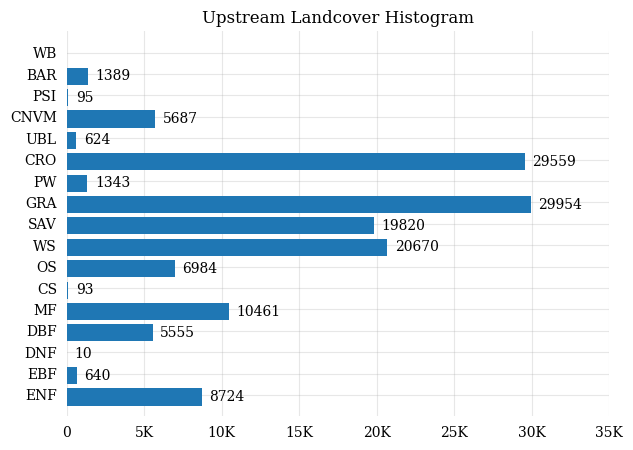

In [ ]:
visualize_feature_distribution(upstream_train_df, CATEGORICAL_FEATURES[0], save_dir=f'{MODEL_RESULT_PLT_DIR}{CATEGORICAL_FEATURES[0]}.png')

## Compare GPP

### Compare GPP estimations of FT-Transformer and MOD17 in different landcover types

In [ ]:
ft_transformer = load_ft_transformer(f'{DOWNSTREAM_E2E_DIR}model')
predict_results = ft_transformer.predict(test_tf)
ft_y_pred = predict_results['output'].ravel()
modis_result = get_modis_compare_data(ft_y_pred)

156/156 [==============================] - 4s 22ms/step


In [ ]:
get_all_metrics(ft_y_pred, modis_result[TARGET_FEATURE], downstream_test_df[TARGET_FEATURE])

RMSE prediction: 3760.3044
RMSE MOD17: 4553.6565
R-Squared prediction: 0.6603
R-Squared MOD17: 0.5018842988215086
Max error prediction: 11849.9615
Max error MOD17: 15912.398000000001
Mean poisson deviance prediction: 1211.8268
Mean poisson deviance MOD17: 1798.840041875777
Mean gamma deviance prediction: 0.1452
Mean gamma deviance MOD17: 0.23863207644273648
Mean pinball loss with alpha = 0.9 prediction: 1562.0970333251955
Mean pinball loss with alpha = 0.9 MOD17: 2446.8259473657854
Mean pinball loss with alpha = 0.09999999999999998 prediction: 1228.2488864151392
Mean pinball loss with alpha = 0.09999999999999998 MOD17: 946.8209213241184


In [ ]:
compare_with_modis_by_landcover(ft_y_pred)

### Compare GPP from models and flux data in terms of landcover

In [ ]:
from catboost import CatBoost

In [ ]:
catboost = CatBoost()      # parameters not required.
catboost.load_model(f'./model/downstream-catboost/model/model.json', format="json")
catboost_y_pred = catboost.predict(downstream_test_df[FEATURES])

In [ ]:
from matplotlib.patches import Patch


def plot_prediction_comparison_box(save_dir=None):
    font_size = 10
    all_downstream_landcover_gpp = get_gpp_for_all_landcovers(
        downstream_test_df,
        [modis_result, pd.DataFrame({TARGET_FEATURE:ft_y_pred}), pd.DataFrame({TARGET_FEATURE:catboost_y_pred})])
    all_labels = []
    # Define which colours you want to use
    colours = ['darkgray', 'lightskyblue', 'cornflowerblue', 'lightcyan']
    labels = ['FLUXNET', 'MOD17', 'FT-Transformer', 'CatBoost']
    plt.rcParams.update({'figure.figsize':(12.25,7), 'figure.dpi':100})

    i=0
    width=0.2
    offset=[n*width for n in [-1.5, -0.5, 0.5, 1.5]]
    for lc, label in landcover_abbr.items():
        df_list = all_downstream_landcover_gpp.get(lc)
        if df_list:
            bp = plt.boxplot(
                df_list, sym='', widths=width,
                labels=labels, patch_artist=True,
                positions=[i + 1 + j for j in offset],
                medianprops={"color":'black', "linewidth": 1,
                        "solid_capstyle": "butt"}
            )
            for j, box in enumerate(bp['boxes']):
                box.set(facecolor=colours[j])

            i+=1
            all_labels.append(label)

    plt.ylabel('GPP', fontsize=font_size)
    plt.ylim([0, 30000])
    locs, _ = plt.yticks()
    plt.yticks(locs, ['0','5K','10K','15K','20K','25K','30K'], fontsize=font_size)
    plt.xticks(np.arange(1, len(all_downstream_landcover_gpp)+1), all_labels, rotation=30, ha="right", fontsize=font_size)
    plt.xlim([0, len(all_downstream_landcover_gpp)+1])

    legend_elements = []
    for i, label in enumerate(labels):
        legend_elements.append(Patch(facecolor=colours[i], label=label))
    plt.legend(handles=legend_elements, fontsize=font_size)

    if save_dir:
        plt.savefig(save_dir, bbox_inches="tight")
    plt.show()

[    0.  5000. 10000. 15000. 20000. 25000. 30000.]


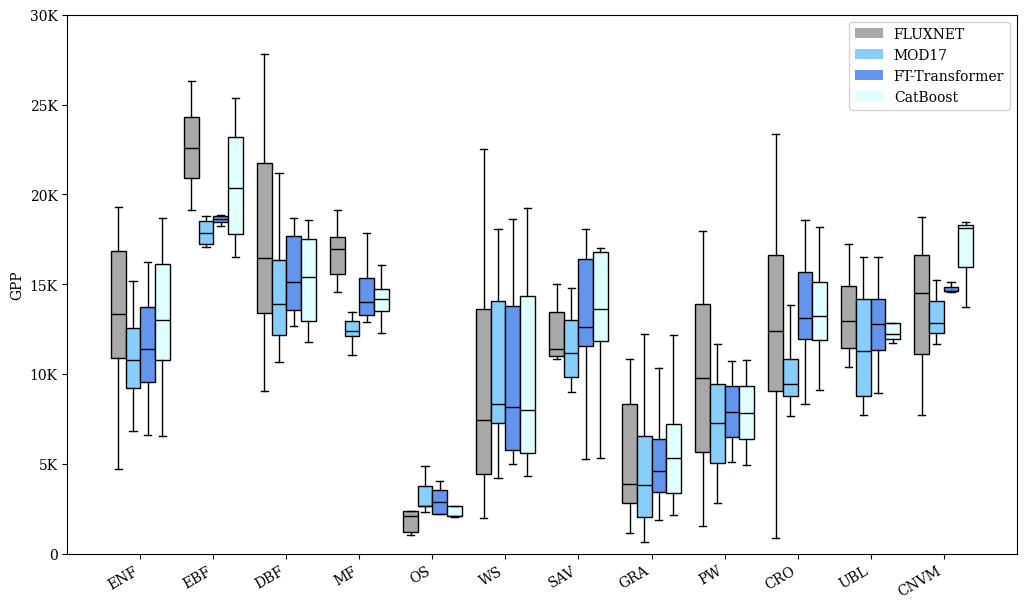

In [ ]:
plot_prediction_comparison_box(save_dir=f'{MODEL_RESULT_PLT_DIR}GPP_landcover_model_comparison.png')

In [ ]:
def get_model_importances(importances, title="Importances", save_dir=None):

    imps_sorted = importances.mean().sort_values(ascending=False)
    plt.rcParams.update({'figure.figsize':(7,1.76), 'figure.dpi':100})
    plt.rcParams['axes.axisbelow'] = True
    plt.tick_params(top=False, bottom=False, left=False, right=False)
    ax = imps_sorted.plot.barh(color='tab:blue', width=0.8)
    for p in ax.patches:
        ax.set_axisbelow(True)
        ax.grid(zorder=10, alpha=.3)
        ax.annotate(str(np.round(p.get_width(), 4)), (p.get_width()+0.005, p.get_y()+p.get_height()/3))
    plt.xlim([0, 0.3])
    plt.yticks(np.arange(len(ax.patches)), ['LC', 'EVI', 'NDVI', 'LSTD', 'PR', 'ET'])
    plt.box(False)
    if save_dir:
        plt.savefig(save_dir, bbox_inches="tight")
    plt.show()

    return imps_sorted

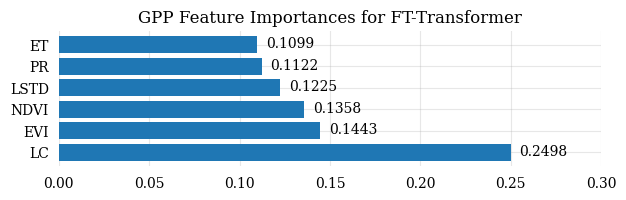

In [ ]:
linear_importances = predict_results['importances']
linear_importances_df = pd.DataFrame(linear_importances[:, :-1], columns = FEATURES)
linear_total_importances = get_model_importances(
    linear_importances_df, title="GPP Feature Importances for FT-Transformer", save_dir=f'{MODEL_RESULT_PLT_DIR}feature_importance.png')